Weather data analysis is an indispensable part of understanding and predicting the ever-changing  climate conditions.
In the era of big data, the availability of vast weather datasets provides valuable  insights into temperature variations, precipitation patterns, and air quality across diverse geographical regions.
One such comprehensive dataset, the "Indian Weather Repository," sourced from Kaggle, comprises a rich repository of meteorological information.
This dataset encompasses 42 columns and a substantial 24,618 rows, covering a wide range of weather-related parameters.

https://www.kaggle.com/datasets/nelgiriyewithana/indian-weather-repository-daily-snapshot

In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

In [111]:
df = pd.read_csv("IndianWeatherRepository.csv")

Information on Data

In [112]:
df.head()

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,12.6,18.5,1,2,05:59 AM,06:41 PM,05:42 PM,03:38 AM,Waxing Gibbous,93
1,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,10.7,14.2,1,1,06:00 AM,06:40 PM,05:39 PM,03:41 AM,Waxing Gibbous,93
2,India,Chhindwara,Madhya Pradesh,22.07,78.93,Asia/Kolkata,1693286100,2023-08-29 10:45,26.3,79.3,...,16.8,20.7,2,2,05:56 AM,06:34 PM,05:32 PM,03:39 AM,Waxing Gibbous,93
3,India,Betul,Madhya Pradesh,21.86,77.93,Asia/Kolkata,1693286100,2023-08-29 10:45,25.6,78.1,...,4.9,6.6,1,1,06:00 AM,06:38 PM,05:36 PM,03:43 AM,Waxing Gibbous,93
4,India,Hoshangabad,Madhya Pradesh,22.75,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.2,81.0,...,11.4,14.8,1,1,06:01 AM,06:39 PM,05:38 PM,03:42 AM,Waxing Gibbous,93


In [113]:
df.columns

Index(['country', 'location_name', 'region', 'latitude', 'longitude',
       'timezone', 'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

country: Country of the weather data


location_name: Name of the location (city)

region: Administrative region of the location

latitude: Latitude coordinate of the location

longitude: Longitude coordinate of the location

timezone: Timezone of the location

last_updated_epoch: Unix timestamp of the last data update

last_updated: Local time of the last data update

temperature_celsius: Temperature in degrees Celsius

temperature_fahrenheit: Temperature in degrees Fahrenheit


condition_text: Weather condition description

wind_mph: Wind speed in miles per hour

wind_kph: Wind speed in kilometers per hour

wind_degree: Wind direction in degrees

wind_direction: Wind direction as 16-point compass

pressure_mb: Pressure in millibars

pressure_in: Pressure in inches

precip_mm: Precipitation amount in millimeters

precip_in: Precipitation amount in inches

humidity: Humidity as a percentage

cloud: Cloud cover as a percentage

feels_like_celsius: Feels-like temperature in Celsius

feels_like_fahrenheit: Feels-like temperature in Fahrenheit

visibility_km: Visibility in kilometers

visibility_miles: Visibility in miles

uv_index: UV Index

gust_mph: Wind gust in miles per hour

gust_kph: Wind gust in kilometers per hour

air_quality_Carbon_Monoxide: Air quality measurement: Carbon Monoxide

air_quality_Ozone: Air quality measurement: Ozone

air_quality_Nitrogen_dioxide: Air quality measurement: Nitrogen Dioxide

air_quality_Sulphur_dioxide: Air quality measurement: Sulphur Dioxide

air_quality_PM2.5: Air quality measurement: PM2.5

air_quality_PM10: Air quality measurement: PM10

air_quality_us-epa-index: Air quality measurement: US EPA Index

air_quality_gb-defra-index: Air quality measurement: GB DEFRA Index

sunrise: Local time of sunrise

sunset: Local time of sunset

moonrise: Local time of moonrise

moonset: Local time of moonset

moon_phase: Current moon phase

moon_illumination: Moon illumination percentage

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24618 entries, 0 to 24617
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       24618 non-null  object 
 1   location_name                 24618 non-null  object 
 2   region                        24618 non-null  object 
 3   latitude                      24618 non-null  float64
 4   longitude                     24618 non-null  float64
 5   timezone                      24618 non-null  object 
 6   last_updated_epoch            24618 non-null  int64  
 7   last_updated                  24618 non-null  object 
 8   temperature_celsius           24618 non-null  float64
 9   temperature_fahrenheit        24618 non-null  float64
 10  condition_text                24618 non-null  object 
 11  wind_mph                      24618 non-null  float64
 12  wind_kph                      24618 non-null  float64
 13  w

In [115]:
print (df.shape)

(24618, 42)


In [116]:
df.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,24618.000000,24618.000000,2.461800e+04,24618.000000,24618.000000,24618.000000,24618.000000,24618.000000,24618.000000,24618.000000,...,24618.000000,24618.000000,24618.000000,24618.000000,24618.000000,24618.000000,24618.000000,24618.000000,24618.000000,24618.000000
mean,23.099389,80.238061,1.695165e+09,24.292156,75.725693,5.470457,8.808307,186.395402,1006.163498,29.711569,...,15.274360,599.901190,26.379929,9.356776,4.722906,51.558993,63.853087,2.429564,4.597774,54.046673
std,5.796170,5.757106,1.117135e+06,3.907001,7.032490,3.256022,5.233713,101.592507,3.245521,0.095834,...,8.390058,519.756446,22.900196,9.704933,11.448956,62.485125,74.403227,1.342424,3.595432,35.086894
min,8.080000,68.970000,1.693286e+09,-5.300000,22.500000,2.200000,3.600000,1.000000,997.000000,29.440000,...,0.000000,113.500000,0.000000,0.000000,0.000000,0.500000,0.700000,1.000000,1.000000,0.000000
25%,20.270000,76.070000,1.694214e+09,23.000000,73.400000,2.900000,4.700000,89.000000,1004.000000,29.650000,...,9.100000,287.100000,9.300000,3.300000,0.900000,11.200000,14.800000,1.000000,1.000000,22.000000
50%,23.970000,78.690000,1.695163e+09,24.800000,76.600000,4.700000,7.600000,215.000000,1006.000000,29.700000,...,14.200000,460.600000,21.300000,6.300000,2.100000,29.400000,38.300000,2.000000,3.000000,56.000000
75%,26.770000,83.900000,1.696113e+09,26.500000,79.700000,6.900000,11.200000,270.000000,1008.000000,29.770000,...,20.100000,741.000000,37.200000,12.000000,4.800000,68.175000,86.700000,4.000000,9.000000,91.000000
max,34.570000,95.800000,1.697060e+09,38.300000,100.900000,26.800000,43.200000,360.000000,1025.000000,30.270000,...,75.600000,11642.500000,171.700000,141.200000,541.700000,899.500000,1043.700000,6.000000,10.000000,100.000000


Data Cleaning:
Identify and handle missing values, duplicates, and inconsistent data.

In [117]:
df.isnull().sum()

country                         0
location_name                   0
region                          0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Oz

Data Visualization:

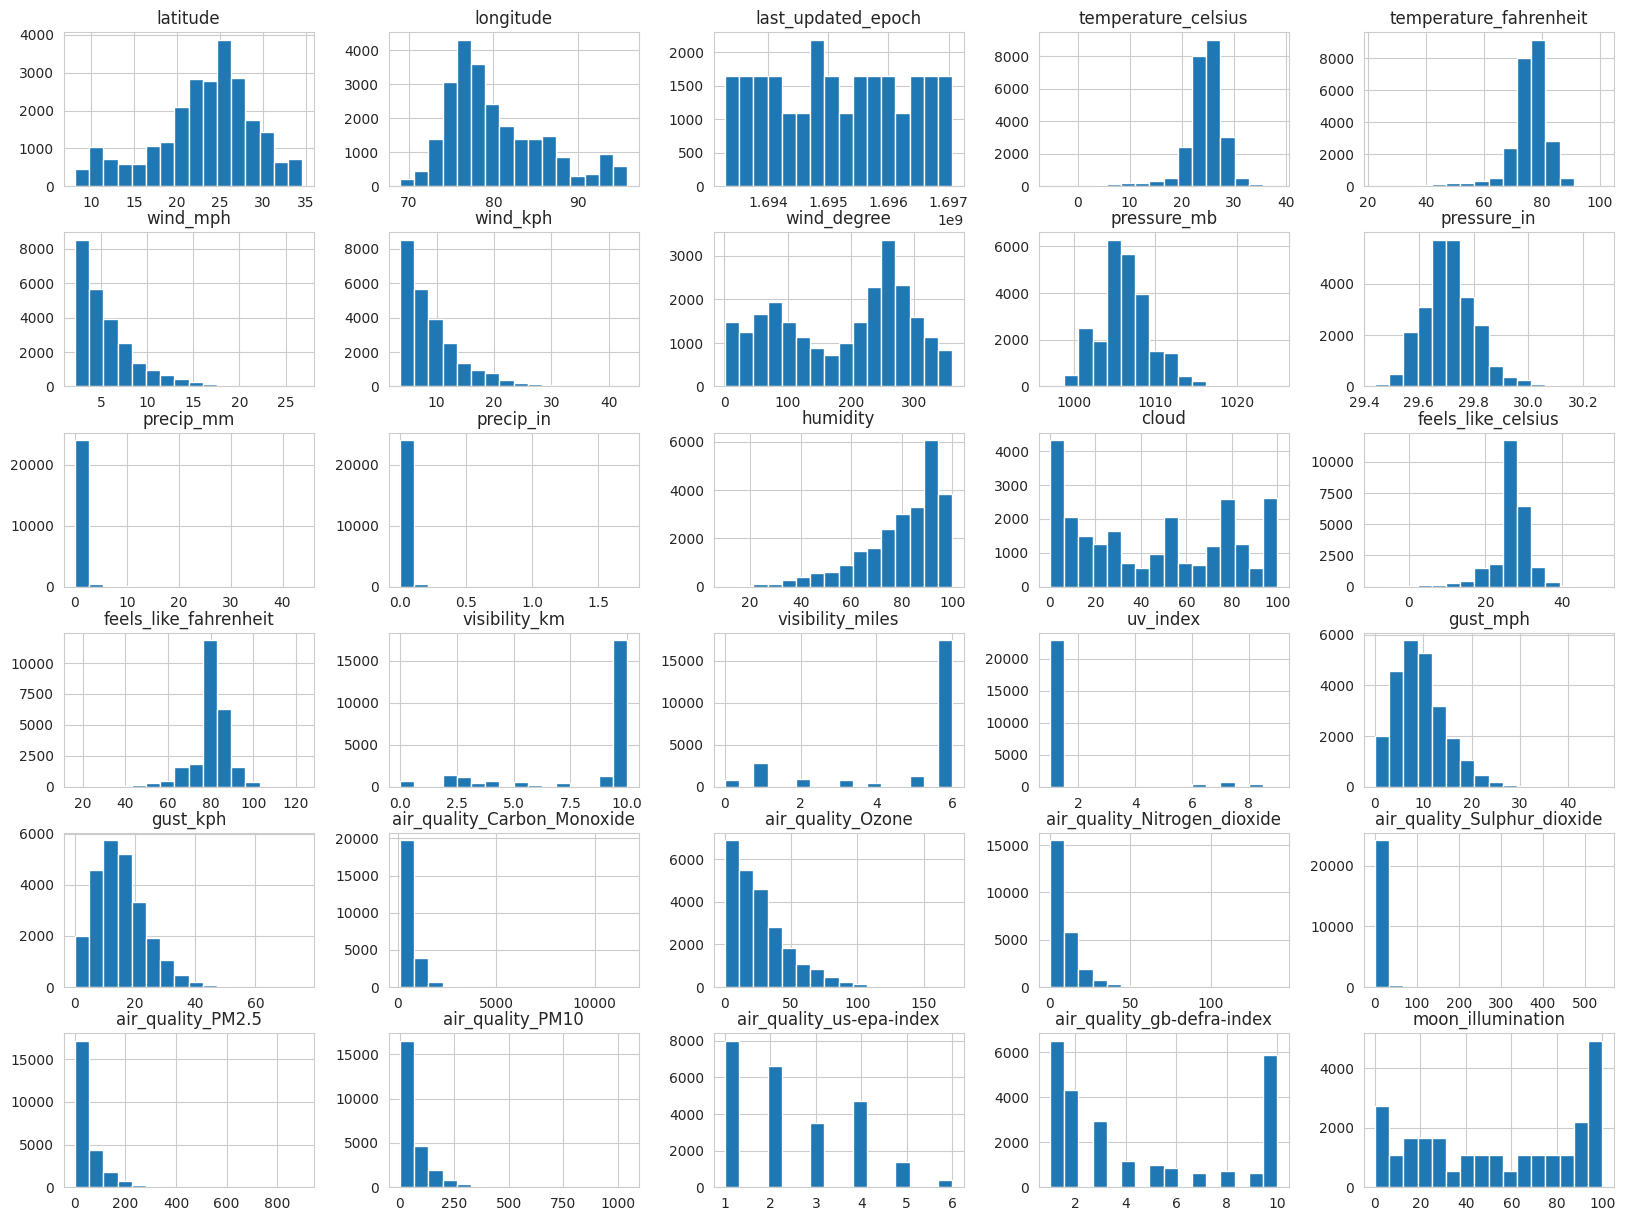

In [118]:
df.hist(bins=16, figsize=(20,15));

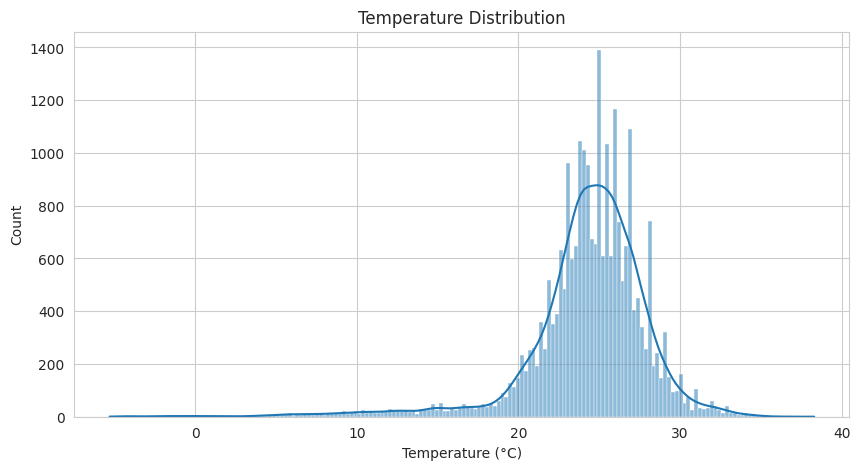

In [143]:
plt.figure(figsize=(10, 5))
sns.histplot(df['temperature_celsius'], kde=True)
plt.xlabel('Temperature (°C)')
plt.title('Temperature Distribution')
plt.show()

Weather Condition Overview:

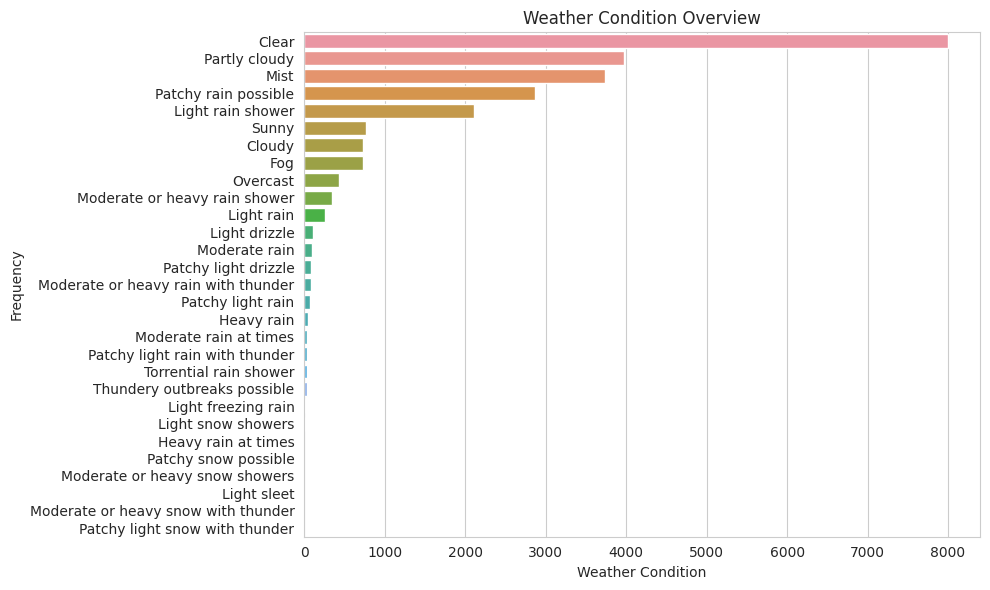

In [144]:
condition_counts = df['condition_text'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=condition_counts.values, y=condition_counts.index)
plt.title('Weather Condition Overview')
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

Temperature and Humidity Correlation:

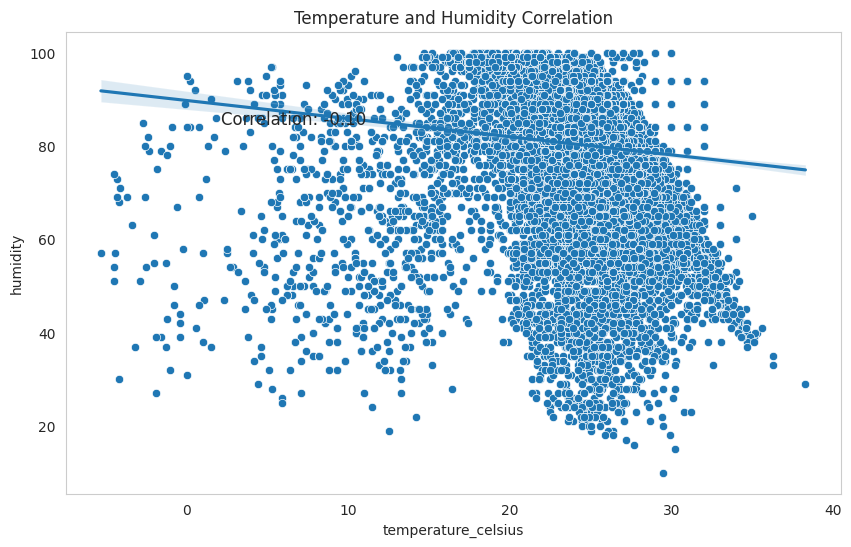

In [145]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temperature_celsius', y='humidity')
plt.title('Temperature and Humidity Correlation')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Humidity (%)')
plt.grid()

# Calculate and display the correlation coefficient
correlation_coefficient = df['temperature_celsius'].corr(df['humidity'])
correlation_text = f'Correlation: {correlation_coefficient:.2f}'
plt.text(0.2, 0.8, correlation_text, fontsize=12, transform=plt.gca().transAxes)

# Draw the regression line
sns.regplot(data=df, x='temperature_celsius', y='humidity', scatter=False)

plt.show()


Temperature Variation by Region

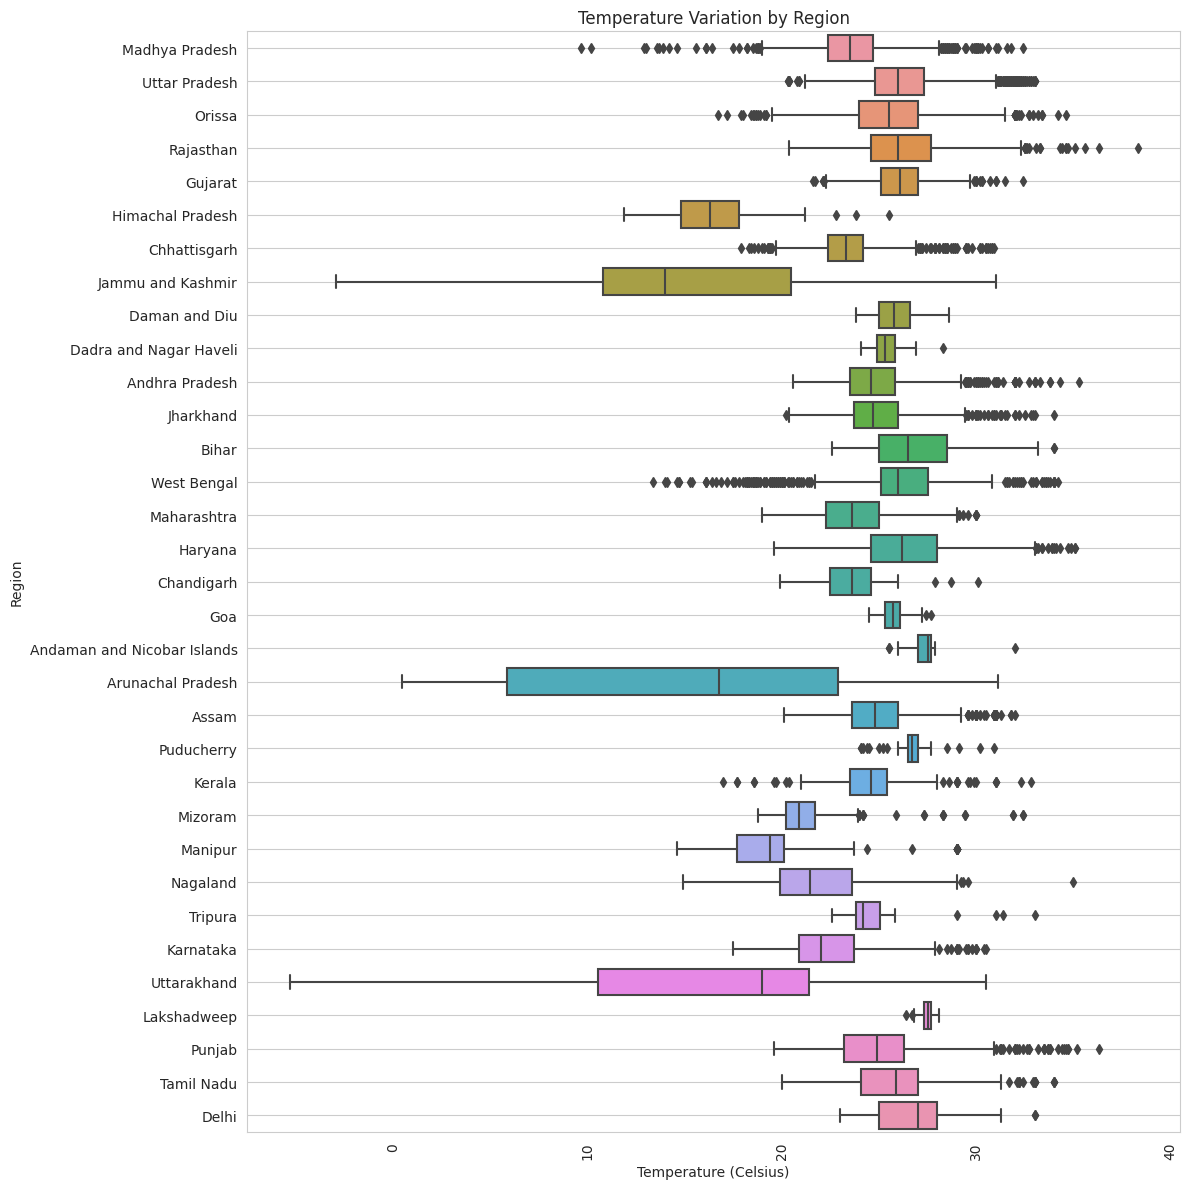

In [122]:
plt.figure(figsize=(12, 12))
sns.boxplot(data=df, x='temperature_celsius', y='region')
plt.title('Temperature Variation by Region')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Region')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

Wind Speed and Wind Gust Relationship:

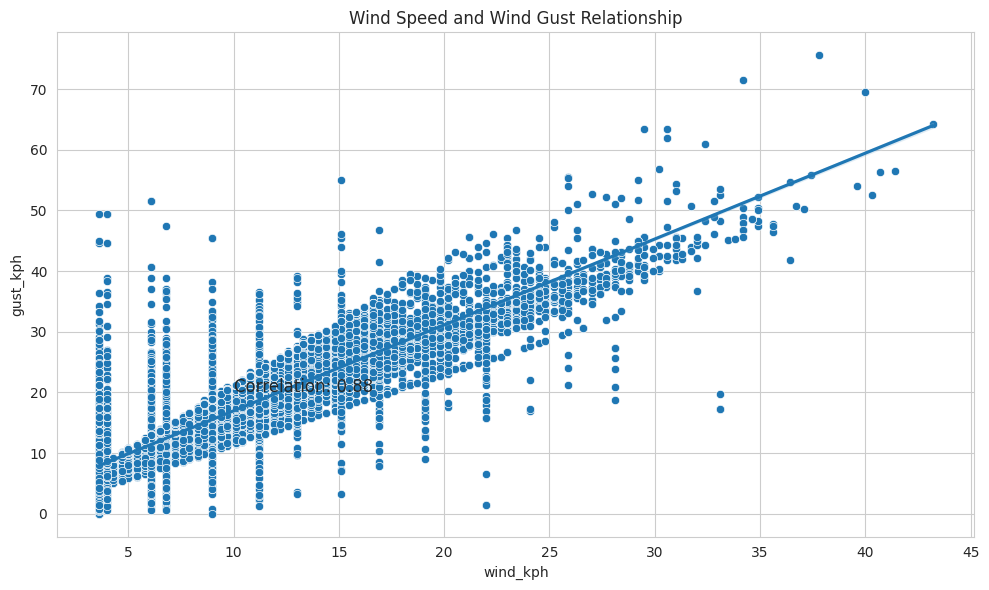

In [146]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='wind_kph', y='gust_kph')
plt.title('Wind Speed and Wind Gust Relationship')
plt.xlabel('Wind Speed (kph)')
plt.ylabel('Wind Gust (kph)')
plt.grid()

# Calculate and display the correlation coefficient
correlation_coefficient = df['wind_kph'].corr(df['gust_kph'])
correlation_text = f'Correlation: {correlation_coefficient:.2f}'
plt.text(10, 20, correlation_text, fontsize=12)

# Draw the regression line
sns.regplot(data=df, x='wind_kph', y='gust_kph', scatter=False)
plt.grid()
plt.tight_layout()
plt.show()

##Compare humidity among regions

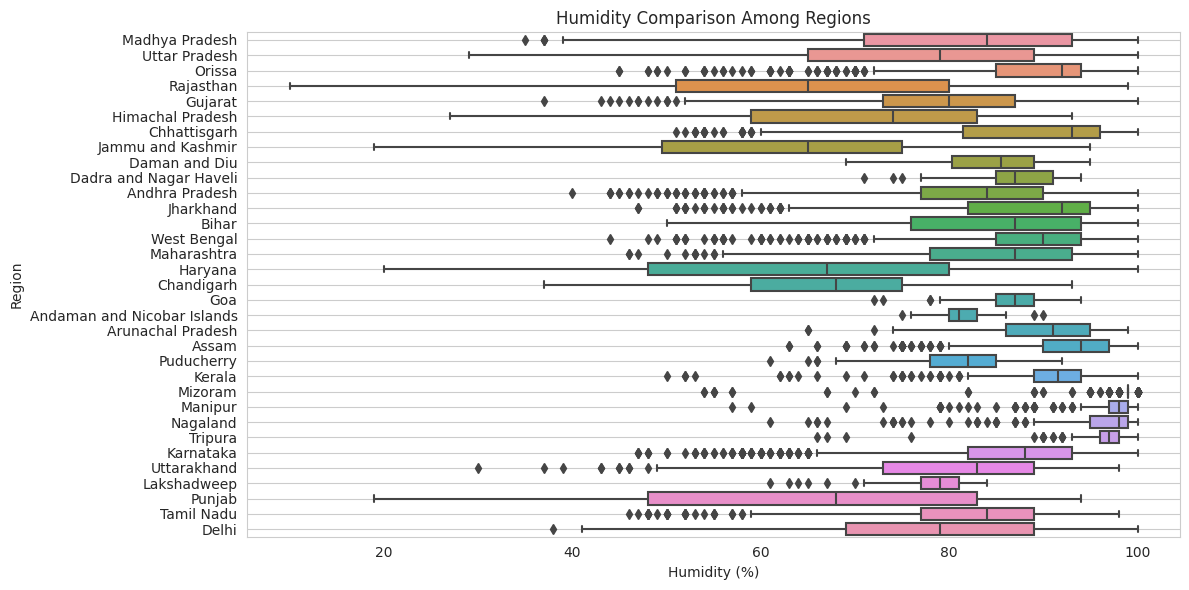

In [150]:
plt.figure(figsize=(12, 6))

# Create a horizontal boxplot to compare humidity among regions
sns.boxplot(data=df, y='region', x='humidity')

# Customize the plot labels and title
plt.ylabel('Region')
plt.xlabel('Humidity (%)')
plt.title('Humidity Comparison Among Regions')

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)  # Set the rotation angle as needed
plt.grid()
plt.tight_layout()
plt.show()




##US EPA Air Quality Index by Region

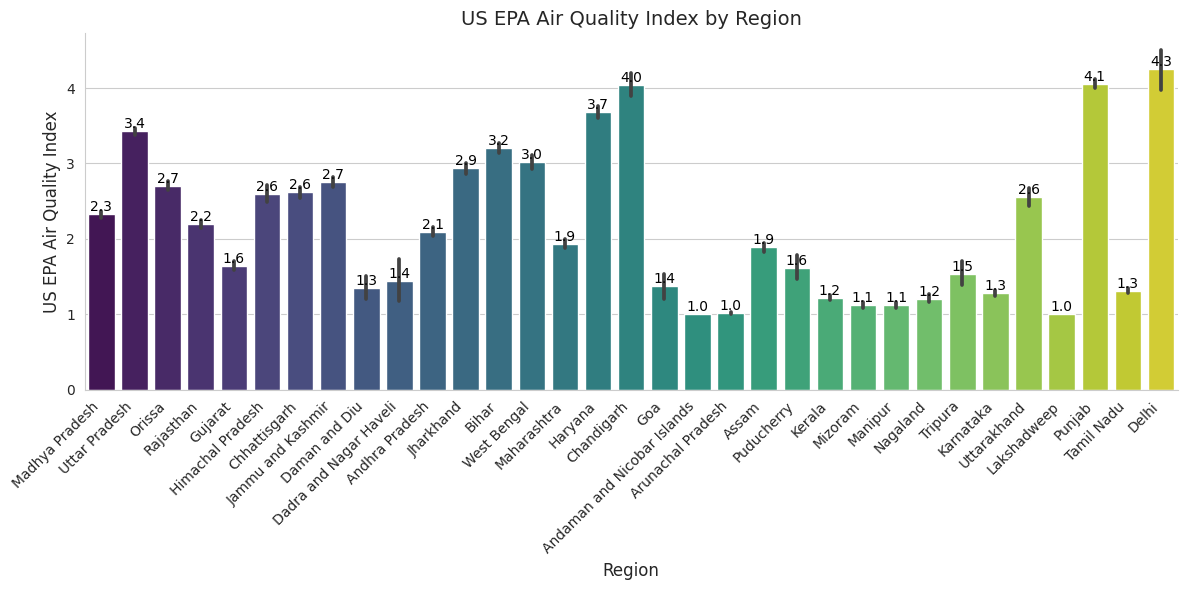

In [148]:
# Set the figure size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # Set a seaborn style for the plot

# Create a bar plot for air quality (US EPA Index) by region
palette = "viridis"  # Choose a color palette
ax = sns.barplot(data=df, x='region', y='air_quality_us-epa-index', palette=palette)

# Customize the plot labels and title
plt.xlabel('Region', fontsize=12)
plt.ylabel('US EPA Air Quality Index', fontsize=12)
plt.title('US EPA Air Quality Index by Region', fontsize=14)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Add data labels above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Add a horizontal grid for reference
ax.yaxis.grid(True)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()


##Time Data vs. Temperature (°C)

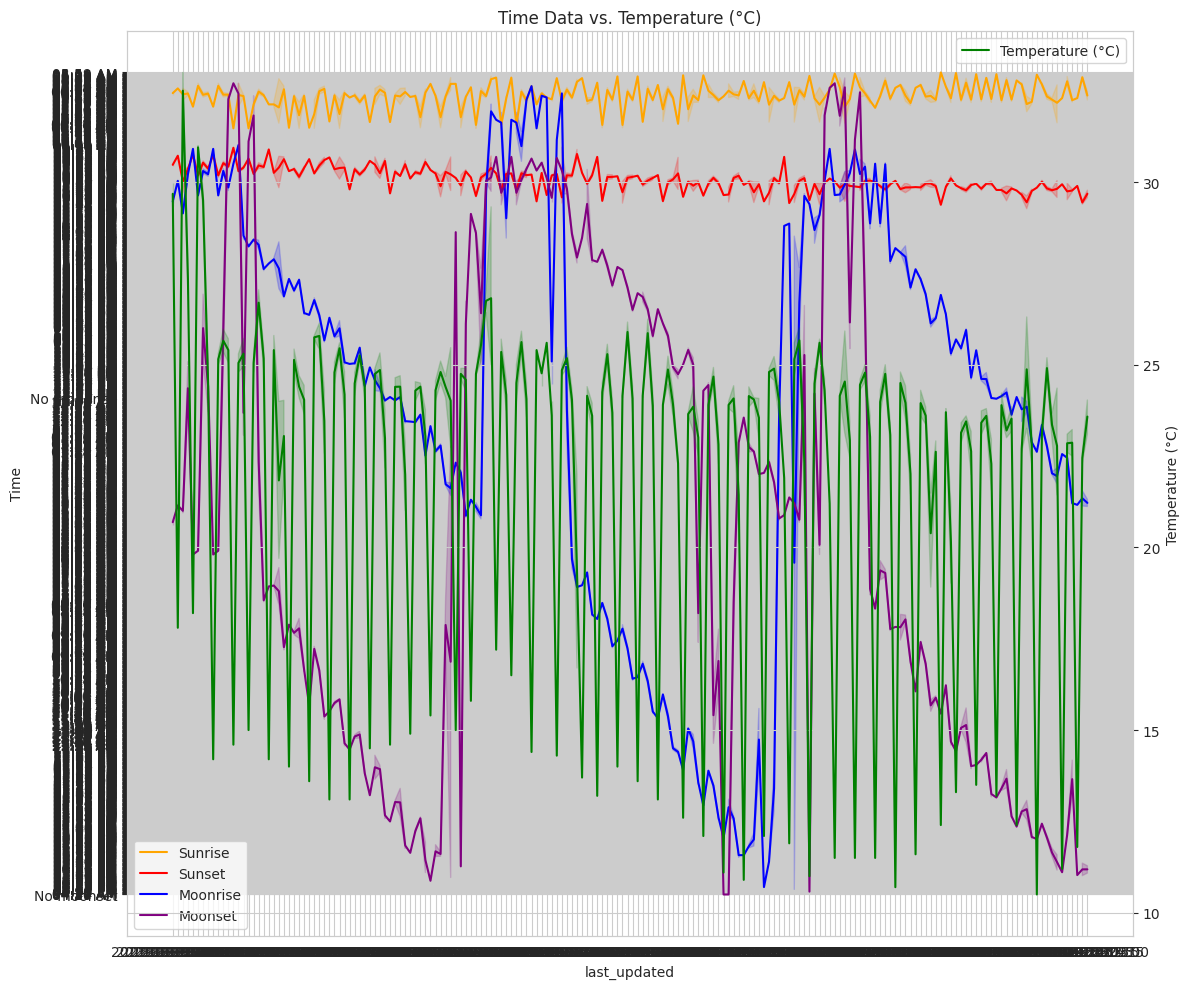

In [149]:
# Set the figure size
plt.figure(figsize=(12, 10))

# Create the line chart for time data (sunrise, sunset, moonrise, moonset)
ax1 = plt.gca()  # Get the current axis
ax2 = ax1.twinx()  # Create a twin y-axis for temperature

# Line chart for time data
sns.lineplot(data=df, x='last_updated', y='sunrise', label='Sunrise', color='orange', ax=ax1)
sns.lineplot(data=df, x='last_updated', y='sunset', label='Sunset', color='red', ax=ax1)
sns.lineplot(data=df, x='last_updated', y='moonrise', label='Moonrise', color='blue', ax=ax1)
sns.lineplot(data=df, x='last_updated', y='moonset', label='Moonset', color='purple', ax=ax1)

# Line chart for temperature
sns.lineplot(data=df, x='last_updated', y='temperature_celsius', label='Temperature (°C)', color='green', ax=ax2)

# Set labels and title
ax1.set_ylabel('Time')
ax2.set_ylabel('Temperature (°C)')
plt.title('Time Data vs. Temperature (°C)')

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


### Normalizing Temperature usinx BoxCoxx

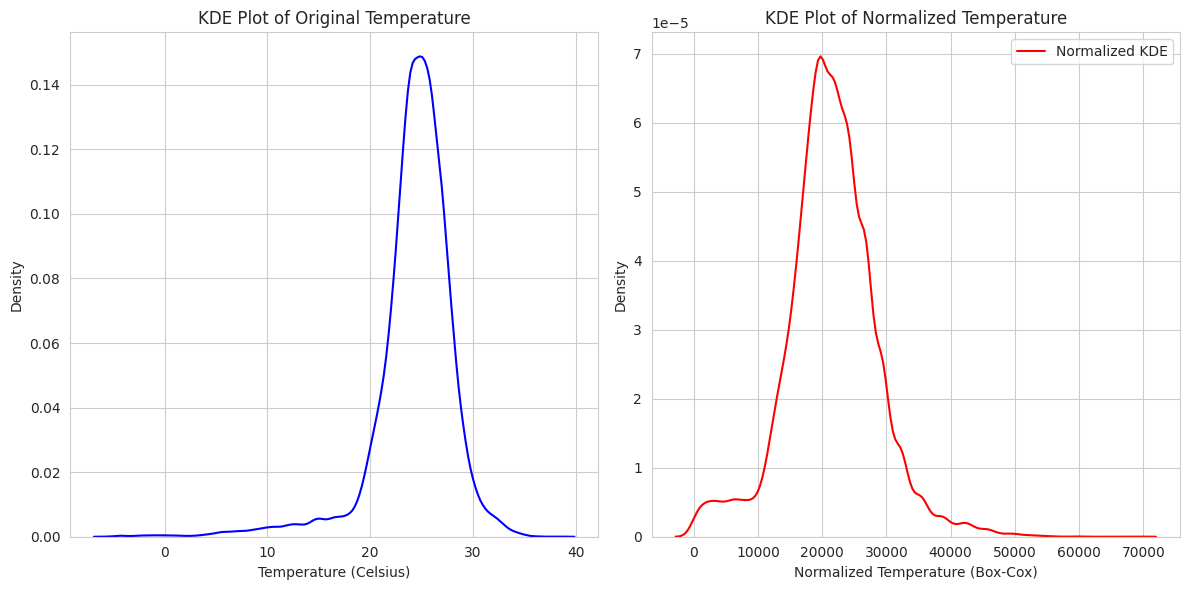

In [151]:
# Column to normalize
column_to_normalize = "temperature_celsius"

# Find the minimum value in the column
min_value = df[column_to_normalize].min()

# Add a constant to make the data positive (you can adjust the constant as needed)
constant = 1 - min_value

# Apply the Box-Cox transformation with the added constant
normalized_values, lambda_ = stats.boxcox(df[column_to_normalize] + constant)

# Create a new DataFrame with the normalized values
df_normalized = pd.DataFrame({column_to_normalize: normalized_values})

# Create subplots for before and after
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create KDE plot for the original data
sns.kdeplot(df[column_to_normalize], color='b', label='Original KDE', ax=axes[0])
axes[0].set_xlabel("Temperature (Celsius)")
axes[0].set_ylabel("Density")
axes[0].set_title("KDE Plot of Original Temperature")

# Create KDE plot for the normalized data
sns.kdeplot(df_normalized[column_to_normalize], color='r', label='Normalized KDE', ax=axes[1])
axes[1].set_xlabel("Normalized Temperature (Box-Cox)")
axes[1].set_ylabel("Density")
axes[1].set_title("KDE Plot of Normalized Temperature")

plt.legend()
plt.tight_layout()
plt.show()


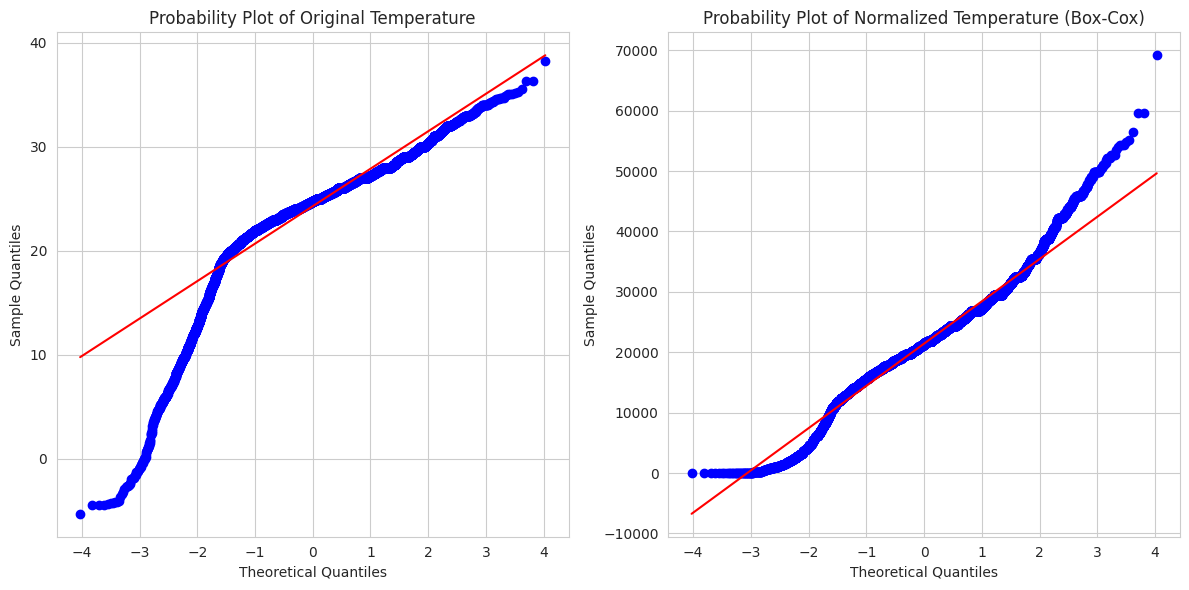

In [128]:
# Create a probability plot for the original data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
stats.probplot(df[column_to_normalize], dist='norm', plot=plt)
plt.title("Probability Plot of Original Temperature")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

# Create a probability plot for the normalized data
plt.subplot(1, 2, 2)
stats.probplot(df_normalized[column_to_normalize], dist='norm', plot=plt)
plt.title("Probability Plot of Normalized Temperature (Box-Cox)")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

plt.tight_layout()
plt.show()

# HYPOTHESIS TESTING



## Temperature Z-TEST

In [129]:
mode_temperature = df["temperature_celsius"].mode()

# If there are multiple modes, you can access them as an array
modes = mode_temperature.to_numpy()

# Print the mode(s)
print("Mode of temperature_celsius:", modes)


Mode of temperature_celsius: [27.]


In [130]:
mean_temperature = df["temperature_celsius"].mean()

# Print the mean
print("Mean of temperature_celsius:", mean_temperature)


Mean of temperature_celsius: 24.292156145909498


In [131]:
# Specify the null hypothesis (H0) and significance level (alpha)
H0 = 25  # Your null hypothesis mean
alpha = 0.05  # Significance level

# Extract the "temperature_celsius" column from the DataFrame
temperature_data = df["temperature_celsius"]

# Calculate the sample mean and standard deviation
sample_mean = temperature_data.mean()
sample_std = temperature_data.std(ddof=1)

# Define the population mean, which is your null hypothesis
population_mean = H0

# Calculate the number of observations (sample size)
n = len(temperature_data)

# Calculate the z-score
z_score = (sample_mean - population_mean) / (sample_std / (n ** 0.5))

# Calculate the p-value for a two-tailed test
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

# Compare the p-value to the significance level and make a decision
if p_value < alpha:
    print("Reject the null hypothesis (H0). There is enough evidence to conclude that the population mean is different from 25C")
else:
    print("Fail to reject the null hypothesis (H0). There is not enough evidence to conclude that the population mean is different from 25C")
print("sample mean is :",sample_mean)
print("sample size is  is :",n)
print("sample stdn is :",sample_std)
print("z-score value is :",z_score)
print("(CDF) of the standard normal distribution at the absolute value of a given z-score :",stats.norm.cdf(abs(z_score)))
print("P-value is: ",p_value)

Reject the null hypothesis (H0). There is enough evidence to conclude that the population mean is different from 25C
sample mean is : 24.292156145909498
sample size is  is : 24618
sample stdn is : 3.9070005766290268
z-score value is : -28.42630254449443
(CDF) of the standard normal distribution at the absolute value of a given z-score : 1.0
P-value is:  0.0


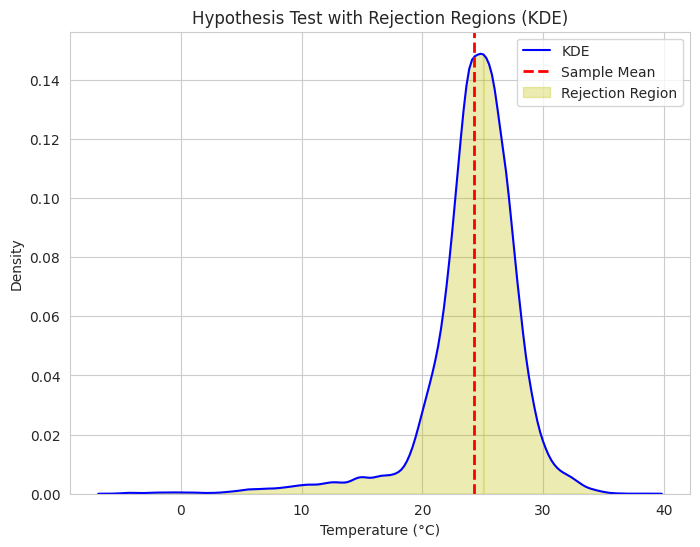

In [132]:
# Calculate the critical z-scores for the rejection regions
z_critical_left = stats.norm.ppf(alpha / 2)
z_critical_right = stats.norm.ppf(1 - alpha / 2)

# Create a KDE plot of the data
plt.figure(figsize=(8, 6))
sns.kdeplot(temperature_data, color='b', label='KDE')

# Add a vertical line for the sample mean
plt.axvline(sample_mean, color='r', linestyle='dashed', linewidth=2, label='Sample Mean')

# Estimate the KDE
kde = gaussian_kde(temperature_data)
x = np.linspace(temperature_data.min(), temperature_data.max(), 1000)

# Shade the rejection regions
plt.fill_between(x, 0, kde(x), where=(x < population_mean - z_critical_left * (sample_std / np.sqrt(n))), color='y', alpha=0.3, label='Rejection Region')
plt.fill_between(x, 0, kde(x), where=(x > population_mean + z_critical_right * (sample_std / np.sqrt(n))), color='y', alpha=0.3)

plt.legend()
plt.xlabel("Temperature (°C)")
plt.ylabel("Density")
plt.title("Hypothesis Test with Rejection Regions (KDE)")
plt.show()


## Temperature T Test

In [133]:
import pandas as pd
from scipy import stats

# Load the data from the CSV file into a DataFrame
df = pd.read_csv("IndianWeatherRepository.csv")

# Specify the null hypothesis (H0) and significance level (alpha)
H0 = 25  # Your null hypothesis mean
alpha = 0.05  # Significance level

# Extract the "temperature_celsius" column from the DataFrame
temperature_data = df["temperature_celsius"]

# Calculate the sample mean
sample_mean = temperature_data.mean()

# Calculate the sample standard deviation
sample_std = temperature_data.std(ddof=1)

# Define the population mean, which is your null hypothesis
population_mean = H0

# Calculate the number of observations (sample size)
n = len(temperature_data)

# Calculate the t-statistic
t_statistic = (sample_mean - population_mean) / (sample_std / (n ** 0.5))

# Calculate the degrees of freedom
degrees_of_freedom = n - 1

# Calculate the p-value for a two-tailed test
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df=degrees_of_freedom))

# Compare the p-value to the significance level and make a decision
if p_value < alpha:
    print("Reject the null hypothesis (H0). There is enough evidence to conclude that the population mean is different from 25C")
else:
    print("Fail to reject the null hypothesis (H0). There is not enough evidence to conclude that the population mean is different from 25C")
print("sample mean is:", sample_mean)
print("sample size is:", n)
print("sample std is:", sample_std)
print("t-statistic value is:", t_statistic)
print("P-value is:", p_value)


Reject the null hypothesis (H0). There is enough evidence to conclude that the population mean is different from 25C
sample mean is: 24.292156145909498
sample size is: 24618
sample std is: 3.9070005766290268
t-statistic value is: -28.42630254449443
P-value is: 0.0


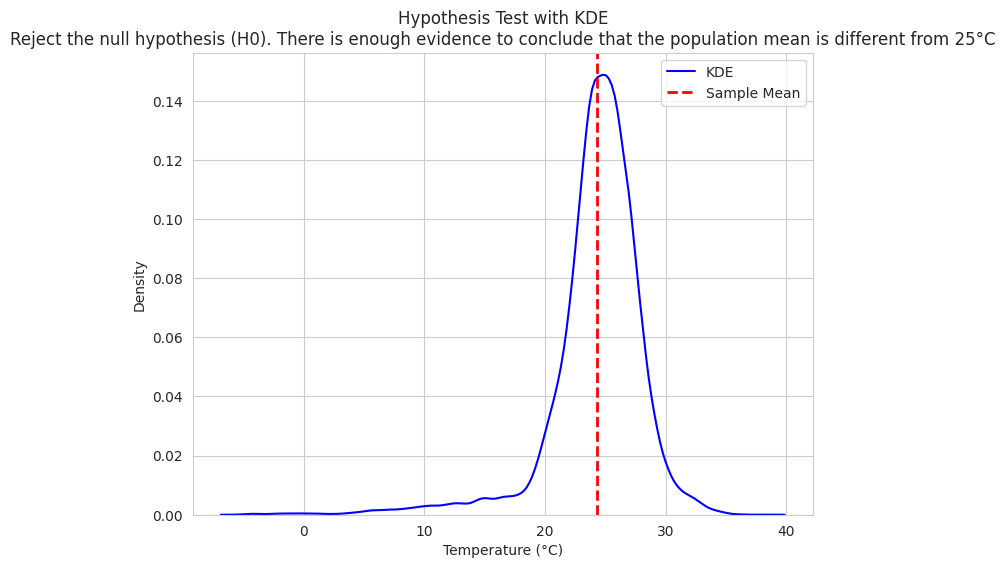

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the data from the CSV file into a DataFrame
df = pd.read_csv("IndianWeatherRepository.csv")

# Specify the null hypothesis (H0) and significance level (alpha)
H0 = 25  # Your null hypothesis mean for temperature_celsius
alpha = 0.05  # Significance level

# Extract the "temperature_celsius" column from the DataFrame
temperature_data = df["temperature_celsius"]

# Calculate the sample mean
sample_mean = temperature_data.mean()

# Calculate the sample standard deviation
sample_std = temperature_data.std(ddof=1)

# Define the population mean, which is your null hypothesis
population_mean = H0

# Calculate the number of observations (sample size)
n = len(temperature_data)

# Calculate the t-statistic
t_statistic = (sample_mean - population_mean) / (sample_std / (n ** 0.5))

# Calculate the degrees of freedom
degrees_of_freedom = n - 1

# Calculate the p-value for a two-tailed test
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df=degrees_of_freedom))

# Compare the p-value to the significance level and make a decision
if p_value < alpha:
    conclusion = "Reject the null hypothesis (H0). There is enough evidence to conclude that the population mean is different from 25°C"
else:
    conclusion = "Fail to reject the null hypothesis (H0). There is not enough evidence to conclude that the population mean is different from 25°C"

# Create a KDE plot of the data
plt.figure(figsize=(8, 6))
sns.kdeplot(temperature_data, color='b', label='KDE')

# Add a vertical line for the sample mean
plt.axvline(sample_mean, color='r', linestyle='dashed', linewidth=2, label='Sample Mean')

plt.legend()
plt.xlabel("Temperature (°C)")
plt.ylabel("Density")
plt.title(f"Hypothesis Test with KDE\n{conclusion}")
plt.show()


## RainFall - Ztest

In [135]:
# Calculate the mean of the "precip_mm" column
mean_precip = df["precip_mm"].mean()

# Calculate the mode of the "precip_mm" column
mode_precip = df["precip_mm"].mode()

# Print the results
print("Mean of precip_mm:", mean_precip)
print("Mode of precip_mm:", mode_precip)


Mean of precip_mm: 0.27899870013811034
Mode of precip_mm: 0    0.0
Name: precip_mm, dtype: float64


In [136]:
import pandas as pd
from scipy import stats

# Load the data from the CSV file into a DataFrame
df = pd.read_csv("IndianWeatherRepository.csv")

# Specify the null hypothesis (H0) and significance level (alpha)
H0 = 0.1  # Your null hypothesis mean for precip_mm
alpha = 0.05  # Significance level

# Extract the "precip_mm" column from the DataFrame
precip_data = df["precip_mm"]

# Calculate the sample mean and standard deviation
sample_mean = precip_data.mean()
sample_std = precip_data.std(ddof=1)

# Define the population mean, which is your null hypothesis
population_mean = H0

# Calculate the number of observations (sample size)
n = len(precip_data)

# Calculate the z-score
z_score = (sample_mean - population_mean) / (sample_std / (n ** 0.5))

# Calculate the p-value for a two-tailed test
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

# Compare the p-value to the significance level and make a decision
if p_value < alpha:
    print("Reject the null hypothesis (H0). There is enough evidence to conclude that the population mean is different from 0.1")
else:
    print("Fail to reject the null hypothesis (H0). There is not enough evidence to conclude that the population mean is different from 0.1")


print("sample mean is :",sample_mean)
print("sample size is  is :",n)
print("sample stdn is :",sample_std)
print("z-score value is :",z_score)
print("(CDF) of the standard normal distribution at the absolute value of a given z-score :",stats.norm.cdf(abs(z_score)))
print("P-value is: ",p_value)


Reject the null hypothesis (H0). There is enough evidence to conclude that the population mean is different from 0.1
sample mean is : 0.27899870013811034
sample size is  is : 24618
sample stdn is : 1.1877267760314694
z-score value is : 23.64611043758097
(CDF) of the standard normal distribution at the absolute value of a given z-score : 1.0
P-value is:  0.0


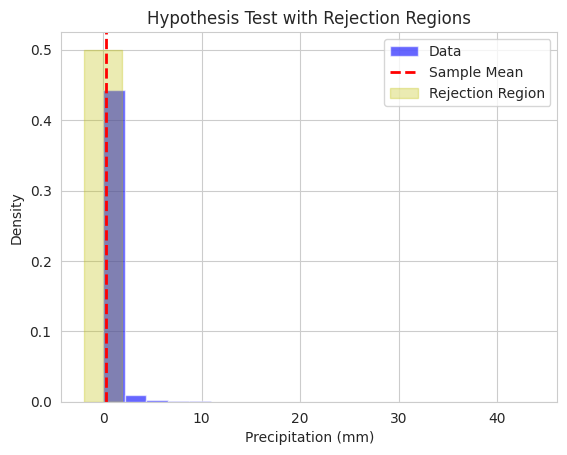

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Load the data from the CSV file into a DataFrame
df = pd.read_csv("IndianWeatherRepository.csv")

# Specify the null hypothesis (H0) and significance level (alpha)
H0 = 0.1  # Your null hypothesis mean for precip_mm
alpha = 0.05  # Significance level

# Extract the "precip_mm" column from the DataFrame
precip_data = df["precip_mm"]

# Calculate the sample mean and standard deviation
sample_mean = precip_data.mean()
sample_std = precip_data.std(ddof=1)

# Define the population mean, which is your null hypothesis
population_mean = H0

# Calculate the number of observations (sample size)
n = len(precip_data)

# Calculate the z-score
z_score = (sample_mean - population_mean) / (sample_std / (n ** 0.5))

# Calculate the critical z-scores for the rejection regions
z_critical_left = stats.norm.ppf(alpha / 2)
z_critical_right = stats.norm.ppf(1 - alpha / 2)

# Create a histogram of the data
plt.hist(precip_data, bins=20, density=True, alpha=0.6, color='b', label='Data')

# Add a vertical line for the sample mean
plt.axvline(sample_mean, color='r', linestyle='dashed', linewidth=2, label='Sample Mean')

# Shade the rejection regions
plt.fill_betweenx([0, 0.5], -z_critical_right, z_critical_right, color='y', alpha=0.3, label='Rejection Region')

plt.legend()
plt.xlabel("Precipitation (mm)")
plt.ylabel("Density")
plt.title("Hypothesis Test with Rejection Regions")
plt.show()


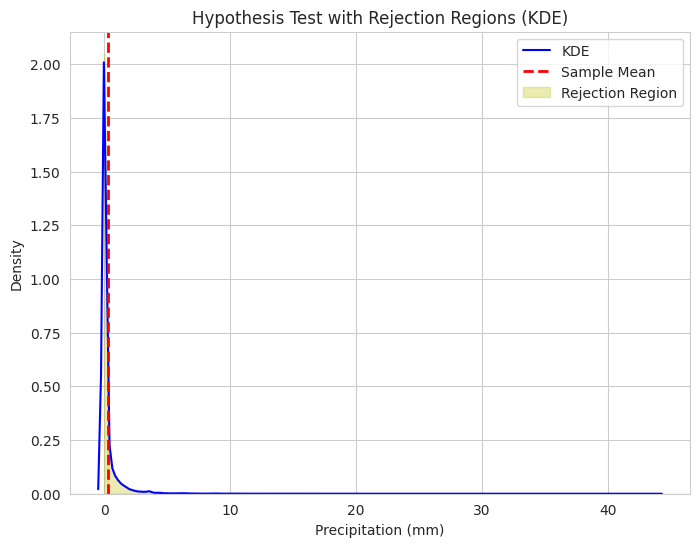

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import gaussian_kde
import numpy as np

# Load the data from the CSV file into a DataFrame
df = pd.read_csv("IndianWeatherRepository.csv")

# Specify the null hypothesis (H0) and significance level (alpha)
H0 = 0.1  # Your null hypothesis mean for precip_mm
alpha = 0.05  # Significance level

# Extract the "precip_mm" column from the DataFrame
precip_data = df["precip_mm"]

# Calculate the sample mean and standard deviation
sample_mean = precip_data.mean()
sample_std = precip_data.std(ddof=1)

# Define the population mean, which is your null hypothesis
population_mean = H0

# Calculate the number of observations (sample size)
n = len(precip_data)

# Calculate the z-score
z_score = (sample_mean - population_mean) / (sample_std / (n ** 0.5))

# Calculate the critical z-scores for the rejection regions
z_critical_left = stats.norm.ppf(alpha / 2)
z_critical_right = stats.norm.ppf(1 - alpha / 2)

# Create a KDE plot of the data
plt.figure(figsize=(8, 6))
sns.kdeplot(precip_data, color='b', label='KDE')

# Add a vertical line for the sample mean
plt.axvline(sample_mean, color='r', linestyle='dashed', linewidth=2, label='Sample Mean')

# Estimate the KDE
kde = gaussian_kde(precip_data)
x = np.linspace(precip_data.min(), precip_data.max(), 1000)

# Shade the rejection regions
plt.fill_between(x, 0, kde(x), where=(x < sample_mean - z_critical_left * (sample_std / np.sqrt(n))), color='y', alpha=0.3, label='Rejection Region')
plt.fill_between(x, 0, kde(x), where=(x > sample_mean + z_critical_right * (sample_std / np.sqrt(n))), color='y', alpha=0.3)

plt.legend()
plt.xlabel("Precipitation (mm)")
plt.ylabel("Density")
plt.title("Hypothesis Test with Rejection Regions (KDE)")
plt.show()


## T-Test

In [139]:
import pandas as pd
from scipy import stats

# Load the data from the CSV file into a DataFrame
df = pd.read_csv("IndianWeatherRepository.csv")

# Specify the null hypothesis (H0) and significance level (alpha)
H0 = 0.1  # Your null hypothesis mean for precip_mm
alpha = 0.05  # Significance level

# Extract the "precip_mm" column from the DataFrame
precip_data = df["precip_mm"]

# Calculate the sample mean and standard deviation
sample_mean = precip_data.mean()
sample_std = precip_data.std(ddof=1)

# Define the population mean, which is your null hypothesis
population_mean = H0

# Calculate the number of observations (sample size)
n = len(precip_data)

# Calculate the t-statistic
t_statistic, p_value = stats.ttest_1samp(precip_data, population_mean)

# Compare the p-value to the significance level and make a decision
if p_value < alpha:
    print("Reject the null hypothesis (H0). There is enough evidence to conclude that the population mean is different from 0.1")
else:
    print("Fail to reject the null hypothesis (H0). There is not enough evidence to conclude that the population mean is different from 0.1")

print("sample mean is:", sample_mean)
print("sample size is:", n)
print("sample std is:", sample_std)
print("t-statistic value is:", t_statistic)
print("P-value is:", p_value)


Reject the null hypothesis (H0). There is enough evidence to conclude that the population mean is different from 0.1
sample mean is: 0.27899870013811034
sample size is: 24618
sample std is: 1.1877267760314694
t-statistic value is: 23.646110437580965
P-value is: 2.9870569467319813e-122


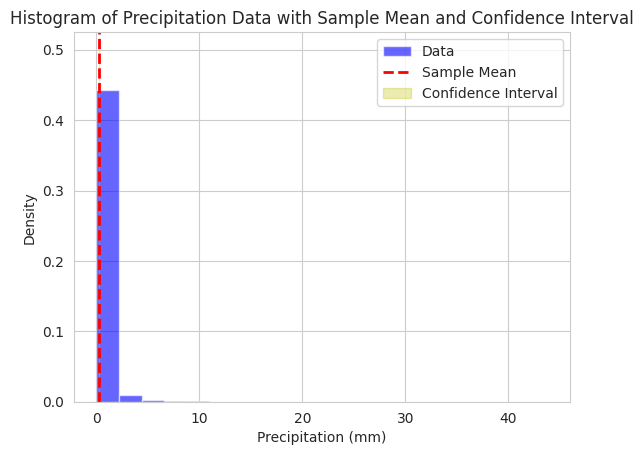

In [140]:
# Create a histogram of the data
plt.hist(precip_data, bins=20, density=True, alpha=0.6, color='b', label='Data')

# Add a vertical line for the sample mean
plt.axvline(sample_mean, color='r', linestyle='dashed', linewidth=2, label='Sample Mean')

# Calculate the confidence interval
conf_interval = stats.t.interval(1 - alpha, df=n - 1, loc=sample_mean, scale=sample_std / np.sqrt(n))

# Shade the confidence interval
plt.fill_betweenx([0, 0.5], conf_interval[0], conf_interval[1], color='y', alpha=0.3, label='Confidence Interval')

plt.legend()
plt.xlabel("Precipitation (mm)")
plt.ylabel("Density")
plt.title("Histogram of Precipitation Data with Sample Mean and Confidence Interval")
plt.show()


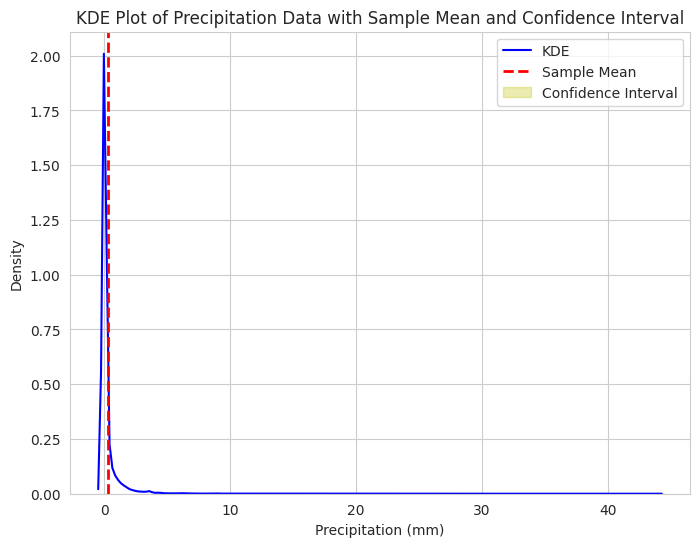

In [141]:
# Create a KDE plot of the data
plt.figure(figsize=(8, 6))
sns.kdeplot(precip_data, color='b', label='KDE')

# Add a vertical line for the sample mean
plt.axvline(sample_mean, color='r', linestyle='dashed', linewidth=2, label='Sample Mean')

# Calculate the confidence interval
conf_interval = stats.t.interval(1 - alpha, df=n - 1, loc=sample_mean, scale=sample_std / np.sqrt(n))

# Shade the confidence interval
plt.fill_betweenx([0, 0.01], conf_interval[0], conf_interval[1], color='y', alpha=0.3, label='Confidence Interval')

plt.legend()
plt.xlabel("Precipitation (mm)")
plt.ylabel("Density")
plt.title("KDE Plot of Precipitation Data with Sample Mean and Confidence Interval")
plt.show()
